In [1]:
from FinancialMachineLearning.labeling.labeling import *

In [2]:
import os
os.chdir('..')
os.chdir('..')
os.getcwd()

'/Users/junghunlee/Desktop/Pycharm/FinancialMachineLearning'

In [11]:
dollar = pd.read_csv('./Data/dollar_bar.csv', index_col = 0, parse_dates = True)

In [12]:
dollar = dollar[~dollar.index.duplicated(keep = 'first')]

In [13]:
dollar

,open,high,low,close,volume
date_time,,,,,
2009-09-28 09:46:35,50.7900,51.0700,50.710,51.07,19844
2009-09-28 09:53:49,51.0700,51.1500,51.050,51.14,20324
2009-09-28 09:55:26,51.1400,51.1500,51.129,51.14,19622
2009-09-28 10:02:52,51.1400,51.2600,51.080,51.25,22319
2009-09-28 10:10:21,51.2500,51.2900,51.190,51.29,21519
...,...,...,...,...,...
2018-10-05 15:58:23,116.2425,116.2425,116.160,116.19,9647
2018-10-05 15:59:20,116.2000,116.2125,116.150,116.18,8821
2018-10-05 15:59:55,116.1800,116.2100,116.140,116.19,9196


#### estimated Volatility

In [14]:
from FinancialMachineLearning.features.volatility import daily_volatility
vol = daily_volatility(dollar.close, lookback = 100)

In [15]:
vol

date_time
2009-09-29 09:59:21         NaN
2009-09-29 10:04:46    0.005981
2009-09-29 10:31:39    0.004469
2009-09-29 10:52:23    0.004376
2009-09-29 11:34:53    0.004261
                         ...   
2018-10-05 15:58:23    0.003059
2018-10-05 15:59:20    0.003037
2018-10-05 15:59:55    0.003014
2018-10-05 15:59:59    0.002990
2018-10-05 16:00:00    0.002964
Name: close, Length: 49969, dtype: float64

#### CUSUM events

In [16]:
from FinancialMachineLearning.filter.filter import cusum_filter

In [17]:
cusum_events = cusum_filter(dollar.close, threshold = vol.mean())

In [18]:
cusum_events

DatetimeIndex(['2009-09-28 09:53:49', '2009-09-28 10:02:52',
               '2009-09-28 10:10:21', '2009-09-28 10:19:36',
               '2009-09-28 10:24:23', '2009-09-28 10:34:30',
               '2009-09-28 10:45:25', '2009-09-28 11:10:57',
               '2009-09-28 11:24:29', '2009-09-28 11:37:06',
               ...
               '2018-10-05 15:45:00', '2018-10-05 15:48:02',
               '2018-10-05 15:53:55', '2018-10-05 15:56:25',
               '2018-10-05 15:57:50', '2018-10-05 15:58:23',
               '2018-10-05 15:59:20', '2018-10-05 15:59:55',
               '2018-10-05 15:59:59', '2018-10-05 16:00:00'],
              dtype='datetime64[ns]', length=46178, freq=None)

In [19]:
dollar = dollar.loc[cusum_events]

In [20]:
dollar

,open,high,low,close,volume
2009-09-28 09:53:49,51.0700,51.1500,51.0500,51.14,20324
2009-09-28 10:02:52,51.1400,51.2600,51.0800,51.25,22319
2009-09-28 10:10:21,51.2500,51.2900,51.1900,51.29,21519
2009-09-28 10:19:36,51.2900,51.2900,51.2100,51.23,19831
2009-09-28 10:24:23,51.2100,51.2600,51.1873,51.25,20200
...,...,...,...,...,...
2018-10-05 15:58:23,116.2425,116.2425,116.1600,116.19,9647
2018-10-05 15:59:20,116.2000,116.2125,116.1500,116.18,8821
2018-10-05 15:59:55,116.1800,116.2100,116.1400,116.19,9196
2018-10-05 15:59:59,116.2000,116.2000,116.1900,116.20,9700


#### Vertical Barriers

In [21]:
vertical_barrier = add_vertical_barrier(cusum_events, dollar['close'], num_days = 1)
vertical_barrier

2009-09-28 09:53:49   2009-09-29 09:59:21
2009-09-28 10:02:52   2009-09-29 10:04:46
2009-09-28 10:10:21   2009-09-29 10:31:39
2009-09-28 10:19:36   2009-09-29 10:31:39
2009-09-28 10:24:23   2009-09-29 10:31:39
                              ...        
2018-10-04 15:41:04   2018-10-05 15:45:00
2018-10-04 15:47:18   2018-10-05 15:48:02
2018-10-04 15:51:37   2018-10-05 15:53:55
2018-10-04 15:58:47   2018-10-05 15:59:20
2018-10-04 16:00:00   2018-10-05 16:00:00
Length: 46138, dtype: datetime64[ns]

#### Triple Barrier Methods

In [22]:
cusum_events

DatetimeIndex(['2009-09-28 09:53:49', '2009-09-28 10:02:52',
               '2009-09-28 10:10:21', '2009-09-28 10:19:36',
               '2009-09-28 10:24:23', '2009-09-28 10:34:30',
               '2009-09-28 10:45:25', '2009-09-28 11:10:57',
               '2009-09-28 11:24:29', '2009-09-28 11:37:06',
               ...
               '2018-10-05 15:45:00', '2018-10-05 15:48:02',
               '2018-10-05 15:53:55', '2018-10-05 15:56:25',
               '2018-10-05 15:57:50', '2018-10-05 15:58:23',
               '2018-10-05 15:59:20', '2018-10-05 15:59:55',
               '2018-10-05 15:59:59', '2018-10-05 16:00:00'],
              dtype='datetime64[ns]', length=46178, freq=None)

In [23]:
vol = vol[~vol.index.duplicated(keep = 'first')]

<Axes: xlabel='date_time'>

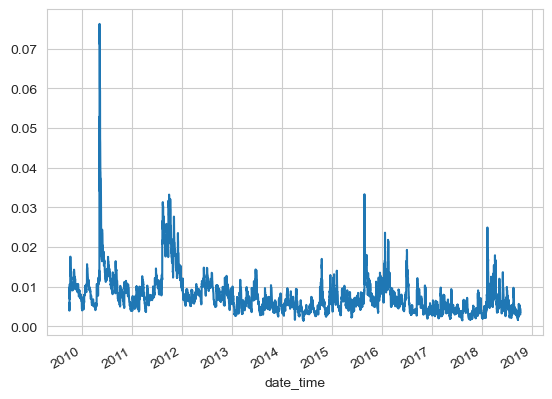

In [24]:
vol.plot()

In [28]:
triple_barrier_events = get_events(close = dollar['close'],
                                   t_events = cusum_events[23:],
                                   pt_sl = [1, 1],
                                   target = vol,
                                   min_ret = 0.01,
                                   num_threads = 1,
                                   vertical_barrier_times = vertical_barrier,
                                   side_prediction = None)
triple_barrier_events

/Users/junghunlee/Desktop/Pycharm/FinancialMachineLearning/FinancialMachineLearning/labeling/labeling.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for loc, vertical_barrier in events_['t1'].fillna(close.index[-1]).iteritems():
/Users/junghunlee/Desktop/Pycharm/FinancialMachineLearning/FinancialMachineLearning/multiprocess/multiprocess.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df0 = df0.append(i)


,t1,trgt,pt,sl
2009-10-02 09:32:42,2009-10-02 10:36:37,0.010414,1,1
2009-10-02 09:49:51,2009-10-05 09:35:27,0.010596,1,1
2009-10-02 10:02:18,2009-10-05 09:35:27,0.010649,1,1
2009-10-02 10:16:15,2009-10-05 09:35:27,0.010644,1,1
2009-10-02 10:22:23,2009-10-05 09:35:27,0.010550,1,1
...,...,...,...,...
2018-06-01 12:33:50,2018-06-04 09:30:00,0.010286,1,1
2018-06-01 13:07:55,2018-06-04 09:30:00,0.010231,1,1
2018-06-01 13:34:23,2018-06-04 09:30:00,0.010134,1,1
2018-06-01 14:05:37,2018-06-04 09:30:00,0.010091,1,1


#### Labeling

In [29]:
labels = meta_labeling(triple_barrier_events, dollar['close'])
labels

,ret,trgt,bin
2009-10-02 09:32:42,0.010761,0.010414,1
2009-10-02 09:49:51,0.005259,0.010596,0
2009-10-02 10:02:18,0.006277,0.010649,0
2009-10-02 10:16:15,0.004852,0.010644,0
2009-10-02 10:22:23,0.004040,0.010550,0
...,...,...,...
2018-06-01 12:33:50,0.002703,0.010286,0
2018-06-01 13:07:55,0.001894,0.010231,0
2018-06-01 13:34:23,0.002432,0.010134,0
2018-06-01 14:05:37,0.003249,0.010091,0


In [30]:
labels['bin'].value_counts()

 0    5032
-1    1896
 1    1843
Name: bin, dtype: int64

#### Drop Labels

In [31]:
clean_labels = drop_labels(labels)

In [34]:
clean_labels

,ret,trgt,bin
2009-10-02 09:32:42,0.010761,0.010414,1
2009-10-02 09:49:51,0.005259,0.010596,0
2009-10-02 10:02:18,0.006277,0.010649,0
2009-10-02 10:16:15,0.004852,0.010644,0
2009-10-02 10:22:23,0.004040,0.010550,0
...,...,...,...
2018-06-01 12:33:50,0.002703,0.010286,0
2018-06-01 13:07:55,0.001894,0.010231,0
2018-06-01 13:34:23,0.002432,0.010134,0
2018-06-01 14:05:37,0.003249,0.010091,0
